In [30]:
import pandas as pd
import numpy as np

In [31]:
original_data = pd.read_csv(
'data/adult.csv',
    names=['Age','Workclass','fnlwgt','Education','Education_Num','Marital Status',
       'Occupation','Relationship','Race','Gender','Capital Gain','Capital Loss',
       'Hours per week','Country','Target'],
    sep=r'\s*,\s*',
    engine='python',
    na_values='?')
original_data.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


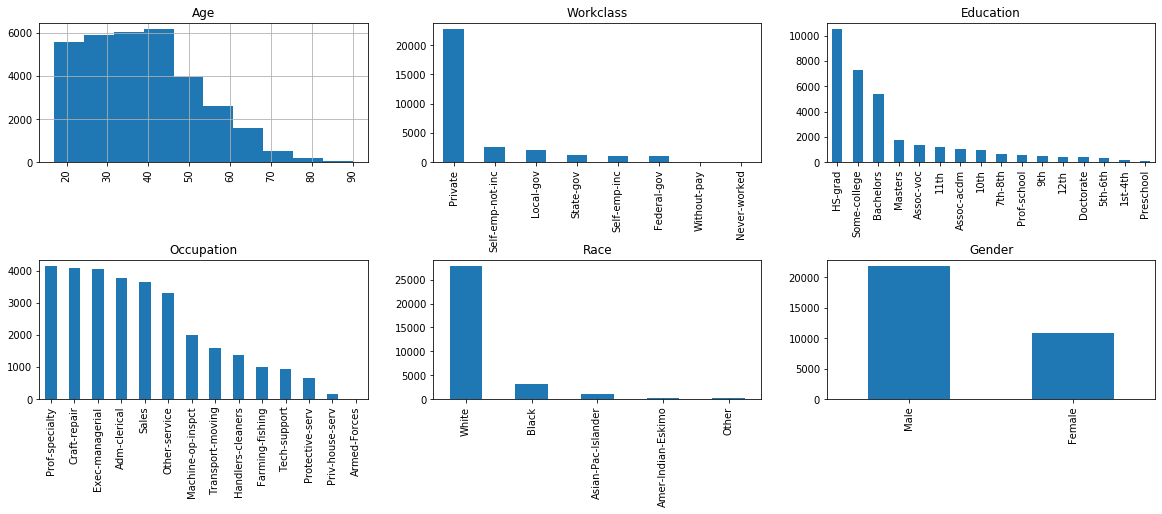

In [32]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig = plt.figure(figsize=(20,20))
cols = 3
rows = math.ceil(float(original_data.shape[1]) / cols)

for i, column in enumerate (['Age', 'Workclass', 'Education', 'Occupation', 'Race', 'Gender']):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if original_data.dtypes[column] == np.object:
        original_data[column].value_counts().plot(kind='bar',axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()

In [33]:
import sklearn.preprocessing as preprocessing

le = preprocessing.LabelEncoder()
original_data['Occupation'] = le.fit_transform(original_data['Occupation'].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
original_data['Target'] = le.fit_transform(original_data['Target'].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,0


In [35]:
original_data.Target.unique()

array([0, 1])

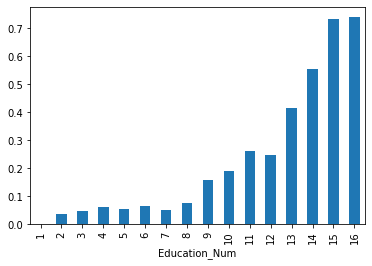

In [36]:
original_data.groupby('Education_Num').Target.mean().plot(kind='bar')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X = original_data[['Education_Num', 'Occupation']]
y = original_data['Target']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [38]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
score = classifier.score(x_test, y_test)
print(score)

/home/michael/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7871948410870566


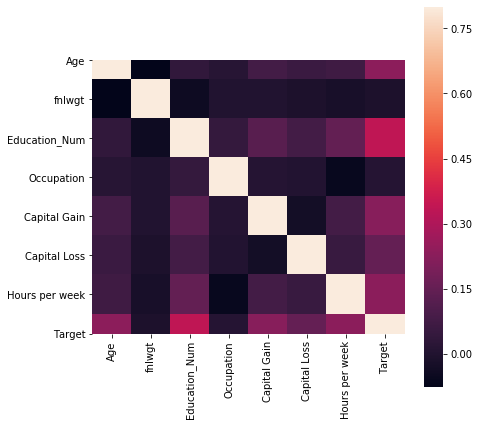

In [39]:
import seaborn as sns
corrmat = original_data.corr()
f, ax = plt.subplots(figsize = (7,7))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

In [40]:
original_data['Target'] = le.fit_transform(original_data['Race'].astype(str))
original_data['Gender'] = le.fit_transform(original_data['Gender'].astype(str))
original_data['Marital Status'] = le.fit_transform(original_data['Marital Status'].astype(str))
original_data['Education'] = le.fit_transform(original_data['Education'].astype(str))

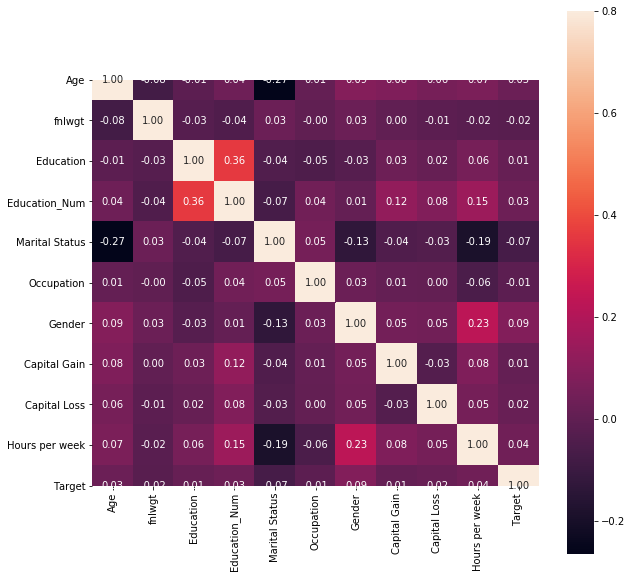

In [41]:
import seaborn as sns
corrmat = original_data.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()

In [42]:
X = original_data[['Education_Num', 'Occupation', 'Age']]
y = original_data['Target']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
classifier.fit(X_train, y_train)
score = classifier.score(x_test, y_test)
print(score)

/home/michael/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8599723629663749


In [43]:
classifier = SVC(kernel='rbf', C=1.0)
classifier.fit(X_train, y_train)
score = classifier.score(x_test, y_test)
print(score)

/home/michael/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8599723629663749


In [44]:
classifier = SVC(kernel='rbf', C=10.0)
classifier.fit(X_train, y_train)
score = classifier.score(x_test, y_test)
print(score)

/home/michael/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8475356978350991


In [45]:
classifier = SVC(kernel='linear', C=1.0)
classifier.fit(X_train, y_train)
score = classifier.score(x_test, y_test)
print(score)

0.8599723629663749
